## Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.

## Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')


## Import Data Set

In [2]:
startup = pd.read_csv('50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA  

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup.corr(method='pearson')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:



print('There are high correlation between R&Dspend \n Profit and also between Marketing spend and profit')

There are high correlation between R&Dspend 
 Profit and also between Marketing spend and profit


## Correlation Analysis

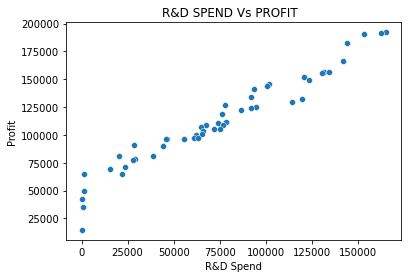

In [11]:
sns.scatterplot(x = 'R&D Spend', y = 'Profit', data = startup)
plt.title( 'R&D SPEND Vs PROFIT  ')
plt.show()

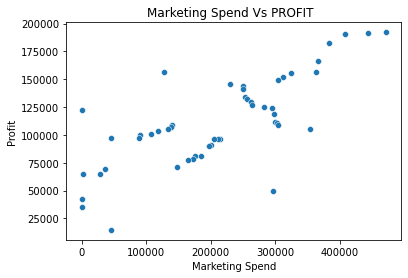

In [12]:
sns.scatterplot(x = 'Marketing Spend', y = 'Profit', data = startup)
plt.title( 'Marketing Spend Vs PROFIT  ')
plt.show()

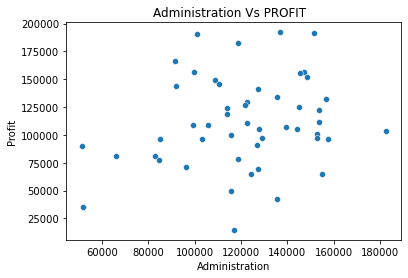

In [13]:
sns.scatterplot(x = 'Administration', y = 'Profit', data = startup)
plt.title( 'Administration Vs PROFIT  ')
plt.show()

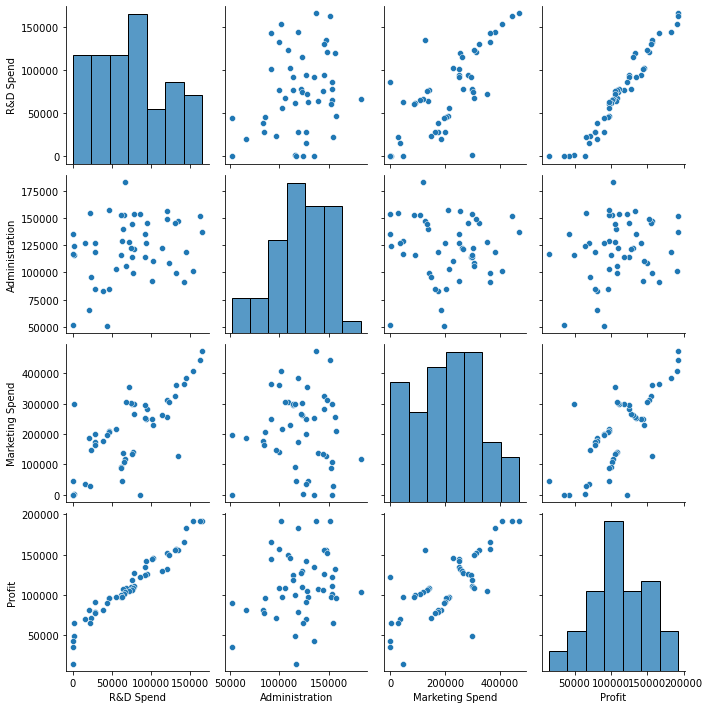

In [14]:
sns.pairplot(data=startup)

## MOdel BUliding

In [21]:
startup_data=startup.rename({'R&D Spend':'RD','Administration':'Admin','Marketing Spend':'Market'},axis=1)
startup_data


,RD,Admin,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
ols_model=smf.ols("Profit~RD+Admin+Market",data=startup_data).fit()

## Model Testing

In [37]:
print(ols_model.params)

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Market           0.027228
dtype: float64


In [40]:
print((ols_model.tvalues).round(2),(ols_model.pvalues).round(3))

Intercept     7.63
RD           17.85
Admin        -0.53
Market        1.66
dtype: float64 Intercept    0.000
RD           0.000
Admin        0.602
Market       0.105
dtype: float64


In [41]:
print('Rsquare:',ols_model.rsquared)
print('Adjusting Rsquare:',ols_model.rsquared_adj)

Rsquare: 0.9507459940683246
Adjusting Rsquare: 0.9475337762901719


In [42]:
profit_market = smf.ols('Profit~Market',data=startup_data).fit()


In [44]:
print((profit_market.tvalues).round(2),(profit_market.pvalues).round(5)) # 

Intercept    7.81
Market       7.80
dtype: float64 Intercept    0.0
Market       0.0
dtype: float64


In [46]:
profit_admin = smf.ols('Profit~Admin',data=startup_data).fit()
print((profit_admin.tvalues).round(2),(profit_admin.pvalues).round(5))

Intercept    3.04
Admin        1.42
dtype: float64 Intercept    0.00382
Admin        0.16222
dtype: float64


In [48]:
profit_admin_market = smf.ols('Profit~Admin+Market',data=startup_data).fit()
print((profit_admin_market.tvalues).round(2),(profit_admin_market.pvalues).round(5))

Intercept    1.14
Admin        2.47
Market       8.28
dtype: float64 Intercept    0.25893
Admin        0.01729
Market       0.00000
dtype: float64


## They have significant pvalues

## Model Validation
####     Two Techniques:
####    1. Collinearity Check 
####    2. Residual Analysis

### The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.

In [53]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rd=smf.ols("RD~Admin+Market",data=startup_data).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_admin=smf.ols("Admin~RD+Market",data=startup_data).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_market=smf.ols("Market~RD+Admin",data=startup_data).fit().rsquared
vif_market=1/(1-rsq_market)

# Putting the values in Dataframe format
d1={'Variables':['RD','Admin','Market'],'VIF':[vif_rd,vif_admin,vif_market]}
VIF_df=pd.DataFrame(d1)
VIF_df

,Variables,VIF
0,RD,2.468903
1,Admin,1.175091
2,Market,2.326773


### None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

### 2) Residual Analysis
### Test for Normality of Residuals (Q-Q Plot) using residual mode

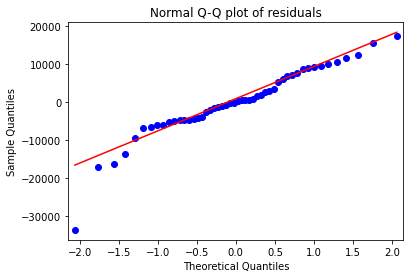

In [59]:
sm.qqplot(ols_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

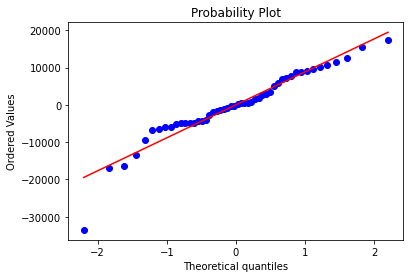

In [62]:
from scipy import stats
stats.probplot(x =ols_model.resid,dist='norm',plot=plt)
plt.show()

# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)


In [64]:

def standard_values(vals) : return (vals-vals.mean())/vals.std()

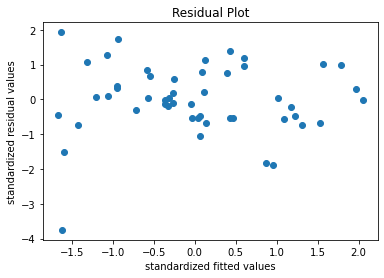

In [66]:
plt.scatter(standard_values(ols_model.fittedvalues),standard_values(ols_model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

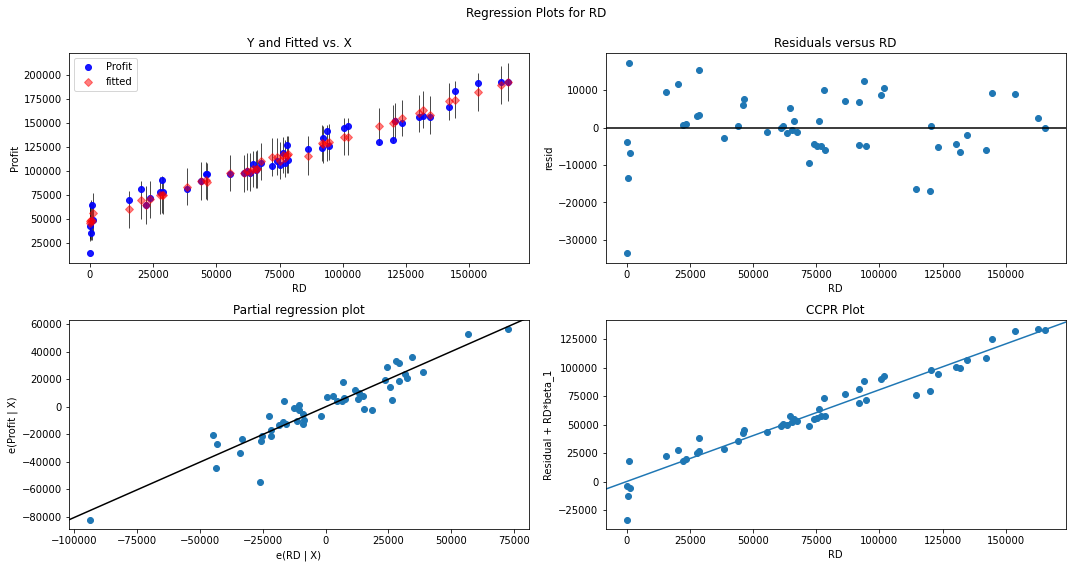

In [67]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ols_model,'RD',fig=fig)
plt.show()

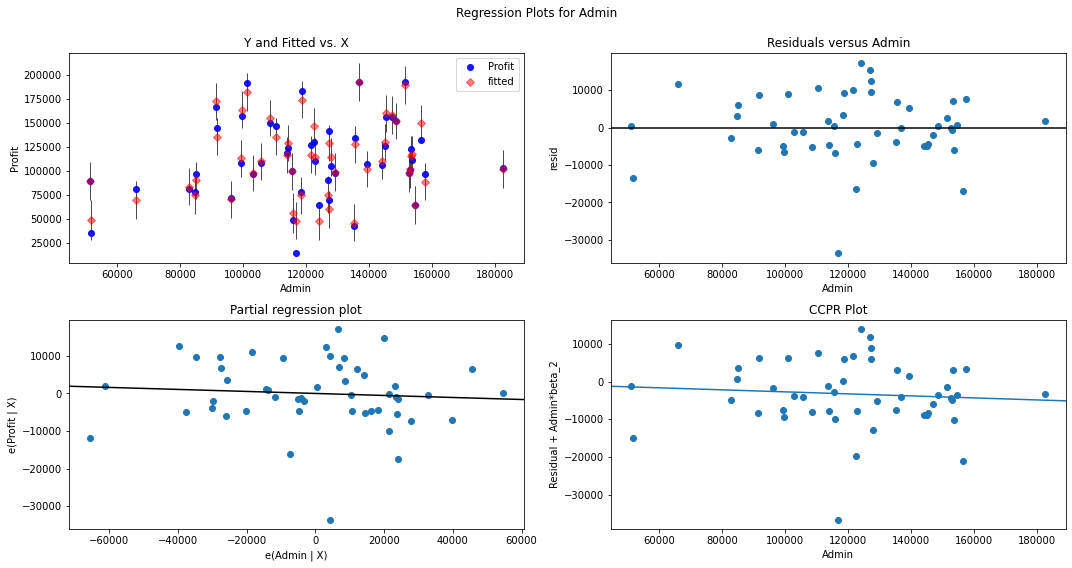

In [68]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ols_model,'Admin',fig=fig)
plt.show()

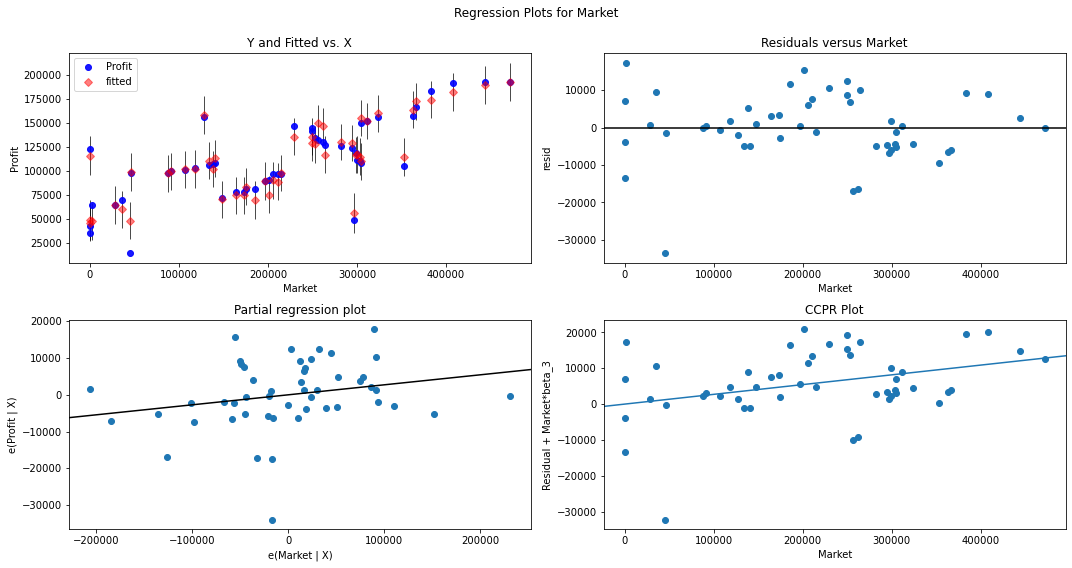

In [69]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(ols_model,'Market',fig=fig)
plt.show()

## checking Outliers or Influencers

In [78]:
(c,_)=ols_model.get_influence().cooks_distance

In [75]:
(c)

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [89]:
print(np.argmax(c),'\nValues along axis:',   np.max(c) )

49 
Values along axis: 0.2880822927543264


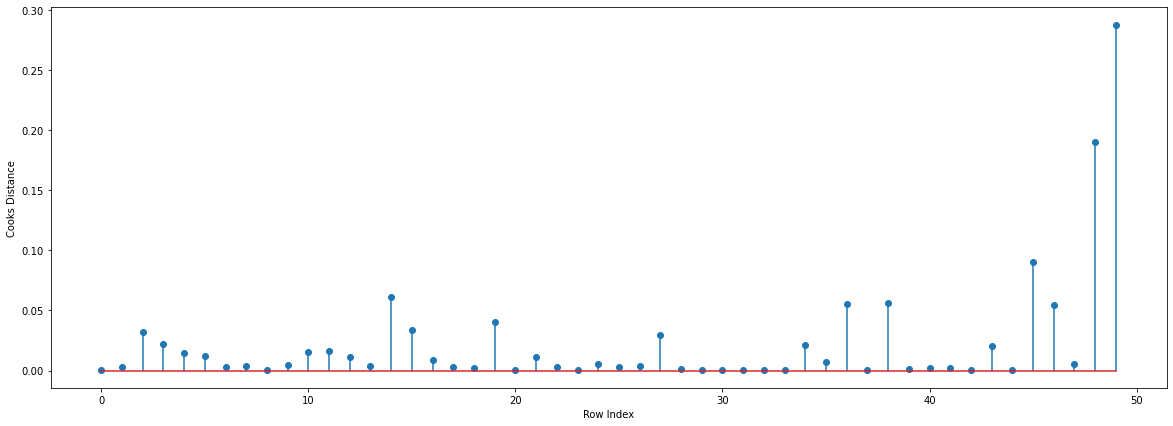

In [76]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

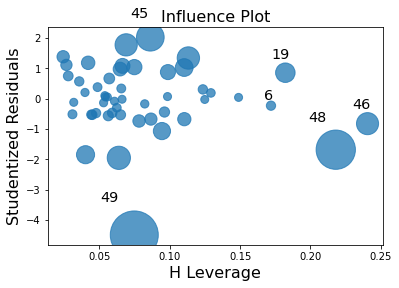

In [104]:

sm.graphics.influence_plot(ols_model,criterion='cooks')
fig.tight_layout( pad=1)
plt.show()


### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [111]:
k=startup_data.shape[1]
n=startup_data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('leverage_cutoff::',leverage_cutoff)

leverage_cutoff:: 0.36


In [114]:
startup_data[startup_data.index.isin([49,48,46])]

,RD,Admin,Market,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [133]:
newdata= startup_data.drop(startup_data.index[[49,48]],axis=0).reset_index(drop=True)

In [134]:
newdata

,RD,Admin,Market,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model prediction by new data

In [135]:
model2=smf.ols("Profit~RD+Admin+Market",data=newdata).fit()

In [136]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           2.03e-31
Time:                        19:58:06   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
Admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
Market         0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        19:58:06   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Market         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD+Admin+Market",data=newdata).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        newdata=newdata.drop(newdata.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        newdata
    else:
        final_model=smf.ols("Profit~RD+Admin+Market",data=newdata).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

In [150]:
final_model.rsquared

0.9882757054424702

In [151]:
newdata

,RD,Admin,Market,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


## MOdel Predection

In [152]:
pred_y =final_model.predict(newdata)

In [159]:
final_prediction =pd.Series(pred_y)

In [160]:
final_prediction

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [161]:
## Rsqaure value

In [164]:
d2={'Prep_Models':['ols_model','final_model'],'Rsquared':[ols_model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,ols_model,0.950746
1,final_model,0.988276
